<center><font size=6> Customer Churn Prediction </font></center>

- Author: Chris Marcus
- Date: 6/3/2024
- Austin AI/ML Course: Project 4 - Neural Networks

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

For a bank customer, build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

##  Target Variable Definition and Key Objectives

The target variable for this model will be the Exited variable given this represents the customer's churn behavior.

The key objective for this model will be to minimize false negatives - meaning that we want to minimize the model predicting that a customer will NOT churn when in fact they will.

## Importing necessary libraries

In [1078]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==2.0.3 -q --user

In [1079]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [1080]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [1081]:
#Reading the dataset.
Data = pd.read_csv('/content/sample_data/Churn.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [1082]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1083]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset

In [1084]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

- The dataset has 10000 rows and 14 columns

### Checking the data types of the columns of the dataset

In [1085]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Checking for duplicate values

In [1086]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [1087]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [1088]:
Data["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [1089]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Initial Observations of the Data

- The dataset has 10000 rows and 14 columns.
- There are 11 numerical and 3 categorical columns.
- Two columns (RowNumber and CustomerId) are likely to be IDs and can be dropped.
- The target variable is Exited, which indicates whether a customer left the bank within six months.
- There are no duplicate values in the dataset.
- There are no missing values in the dataset.
- The target variable (Exited) is imbalanced, with 79.6% of customers not leaving the bank and 20.4% leaving the bank.
- The average age of customers is 38.9 years old, and the average balance is $116,297.
- Surmame may be considered to be PII and is likely not needed for modelling purposes so should be investigated for dropping.

In [1090]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- As suspected, RowNumber and CustomerID are ids so they can be dropped
- 2932 unique customers out of 10000 entries appears to be low and warrents further investigation.
- Only three unique geographies may not provide enough granularity to be useful for model prediction but should be investigated.
- 460 unique credit scores suggest that we create credit bands in order to reduce this number
- 9999 unique salaries is also very high so salary categories/bands should be created
- 6382 unique balanced is similiarly high and should be categorized/banded.

In [1091]:
# Now look at the non-numeric varaibles
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


- As suspected, surname will not be useful for model prediction so it can be dropped
- WIth only threed unique values in geography, while low, these should be kept as they may be useful given these are county specific. One hot encoding should be done.
- Gender is clearly a useful parameter and should be converted to numeric as well.

## Exploratory Data Analysis

In [1092]:
# EDA functions used to create labeled barplots
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1093]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1094]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [1095]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

###Credit Score

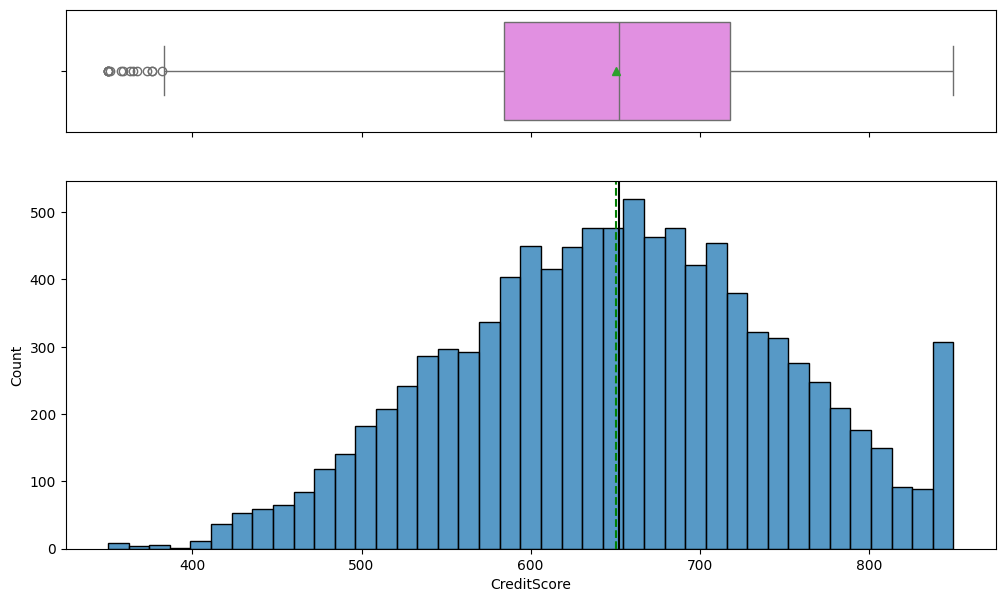

In [1096]:
histogram_boxplot(Data, "CreditScore")

#### CreditScore Observations

- The distribution of CreditScore is unimodal and slightly skewed to the right.
- The median CreditScore is 650.
- The mean CreditScore is 650.53.
- The minimum CreditScore is 350.
- The maximum CreditScore is 850.
- There are no outliers in the CreditScore distribution.

### Age

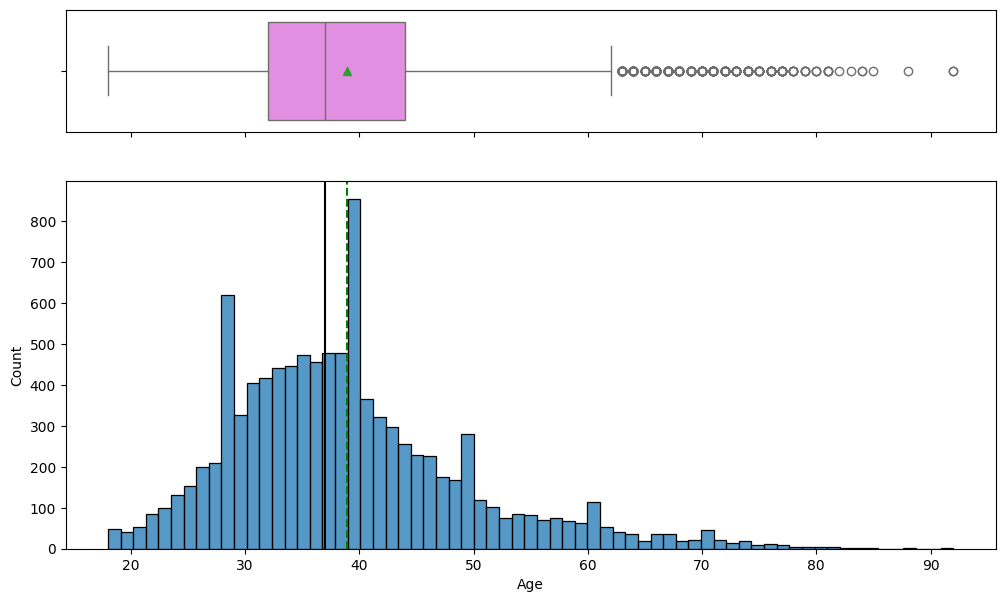

In [1097]:
histogram_boxplot(Data, "Age")

#### Age Observations

- The distribution of Age is unimodal and slightly skewed to the right.
- The median Age is 37 years old.
- The mean Age is 38.9 years old.
- The minimum Age is 18 years old.
- The maximum Age is 92 years old.

### Geography

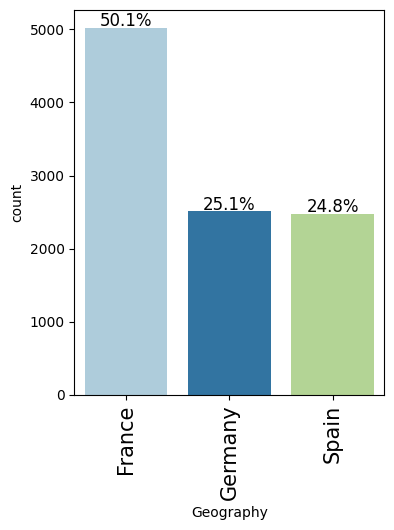

In [1098]:
labeled_barplot(Data, "Geography",perc=True)

#### Geography Observations
- France represents the largest proportion of customers with roughly 50%
- Gername and Spain are equal splitting the remaining 50%
- Bivariate analysis should look into the relationship between country and churn to see if churn rates are higher in any specific country.

### Gender

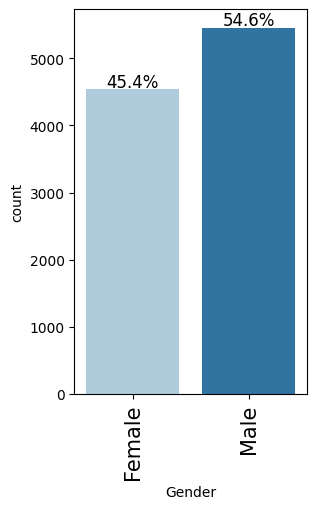

In [1099]:
labeled_barplot(Data, "Gender",perc=True)

#### Gender observations
- There is a fairly even split between male and female with a slight skew to male
- No customers identified in other categories, or the data acquistion did not account for other categories

### Tenure

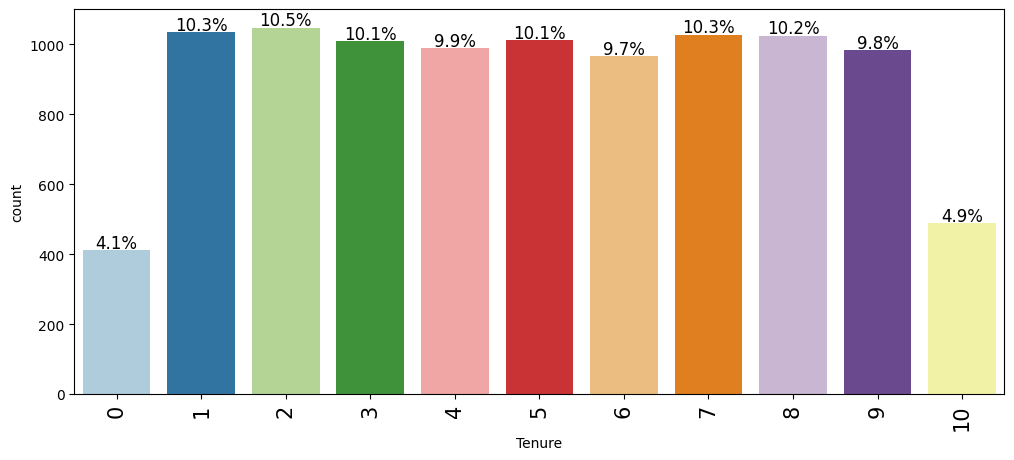

In [1100]:
labeled_barplot(Data, "Tenure",perc=True)

#### Teunure Obervations
- The distribution of Tenure is unimodal and slightly skewed to the right.
- The median Tenure is 5 years.
- The mean Tenure is 5.02 years.
- The minimum Tenure is 0 years.
- The maximum Tenure is 10 years.

### NumOfProducts

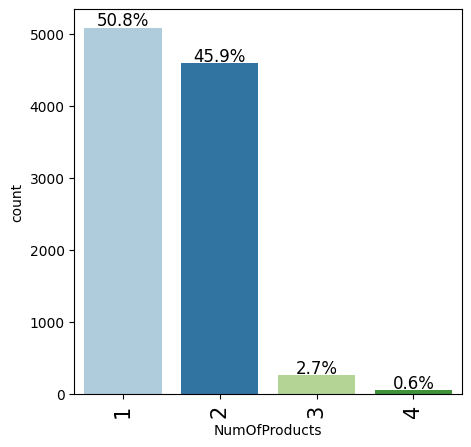

In [1101]:
labeled_barplot(Data, "NumOfProducts",perc=True)

#### NumOfProducts Observations
- Number of products is right skewed
- The vast majority of customers ~97%, has under three products

### Balance

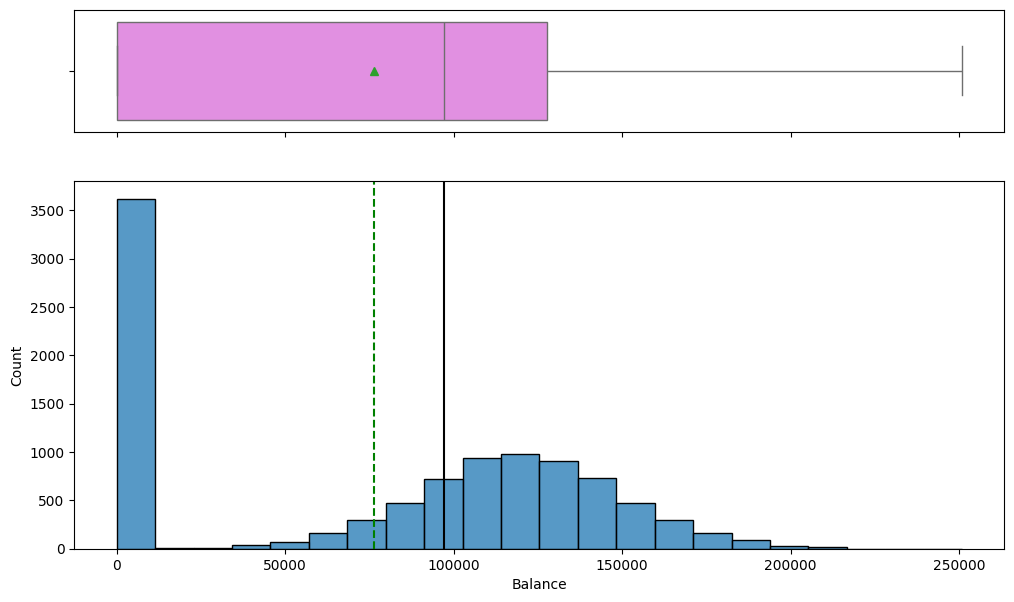

In [1102]:

histogram_boxplot(Data, "Balance")


#### Balance Observations
- The distribution of Balance is unimodal and skewed to the right.
- The median Balance is $87,815.
- The mean Balance is $116,297.
- The minimum Balance is $0.
- The maximum Balance is $250,898.
- There are a few outliers in the Balance distribution.


NOTE: The number of zero balance accounts is very high. Should look at this during bivariate analysis to understand why this is so and try to determine if data adjustments will be needed and/or if this parameter should be dropped given the high percentage of zero balance accounts.**


###Has Credit Card

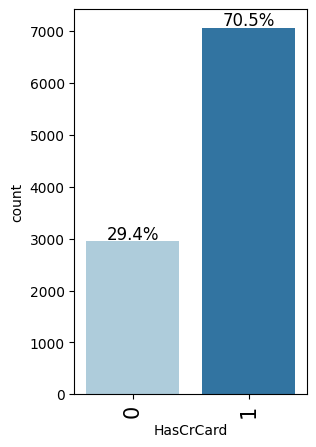

In [1103]:
labeled_barplot(Data, "HasCrCard",perc=True)

#### Has Credit Card Observations
- The percentage of customers having a credit card is significant at 70.5%.

### EstimatedSalary

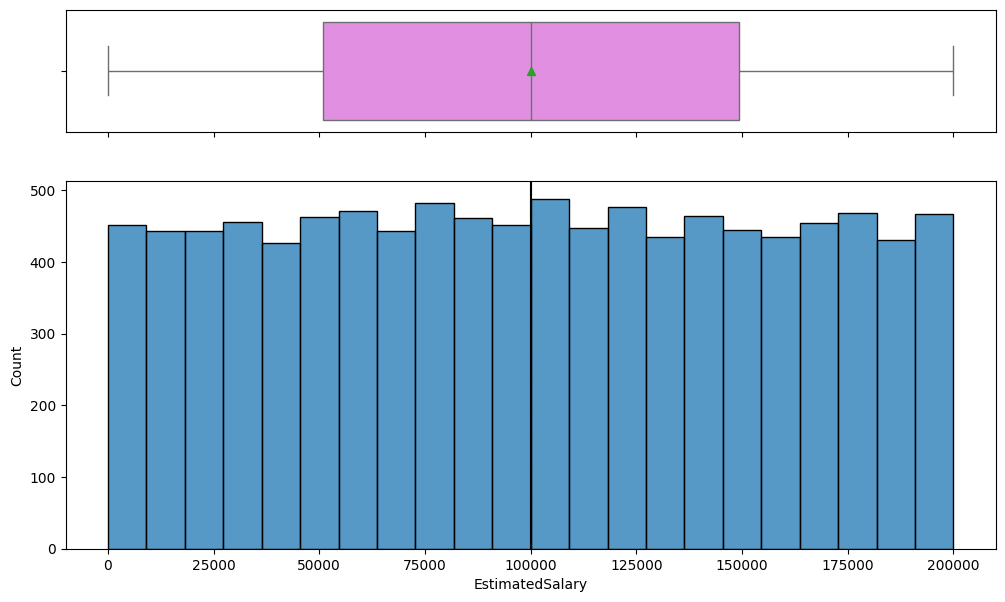

In [1104]:

histogram_boxplot(Data, "EstimatedSalary")


#### EstimatedSalary Observations
- The distribution of EstimatedSalary is unimodal and skewed to the right.
- The median EstimatedSalary is $100,000.
- The mean EstimatedSalary is 100,090.
- The minimum EstimatedSalary is 11,500.
- The maximum EstimatedSalary is 199,992.
- There are a few outliers in the EstimatedSalary distribution.

### IsActiveMember

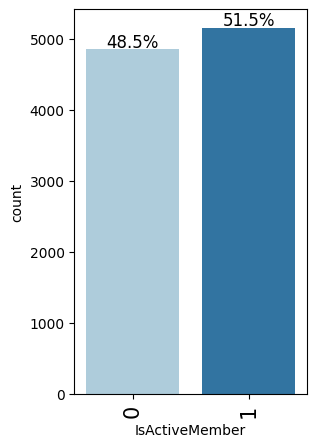

In [1105]:
labeled_barplot(Data, "IsActiveMember",perc=True)

#### IsActiveMember Observations:
- There is a slightly higer percentage of active members at 51.5%
- This column should be analyzed further in bivariate analysis to see if it duplicates the Exited column when = 1. Note that Exited only reflects the last six months and it is unknown whether there is a timeframe on IsActive, but likely there is not.

### Bivariate Analysis

### Credit Score and Exited

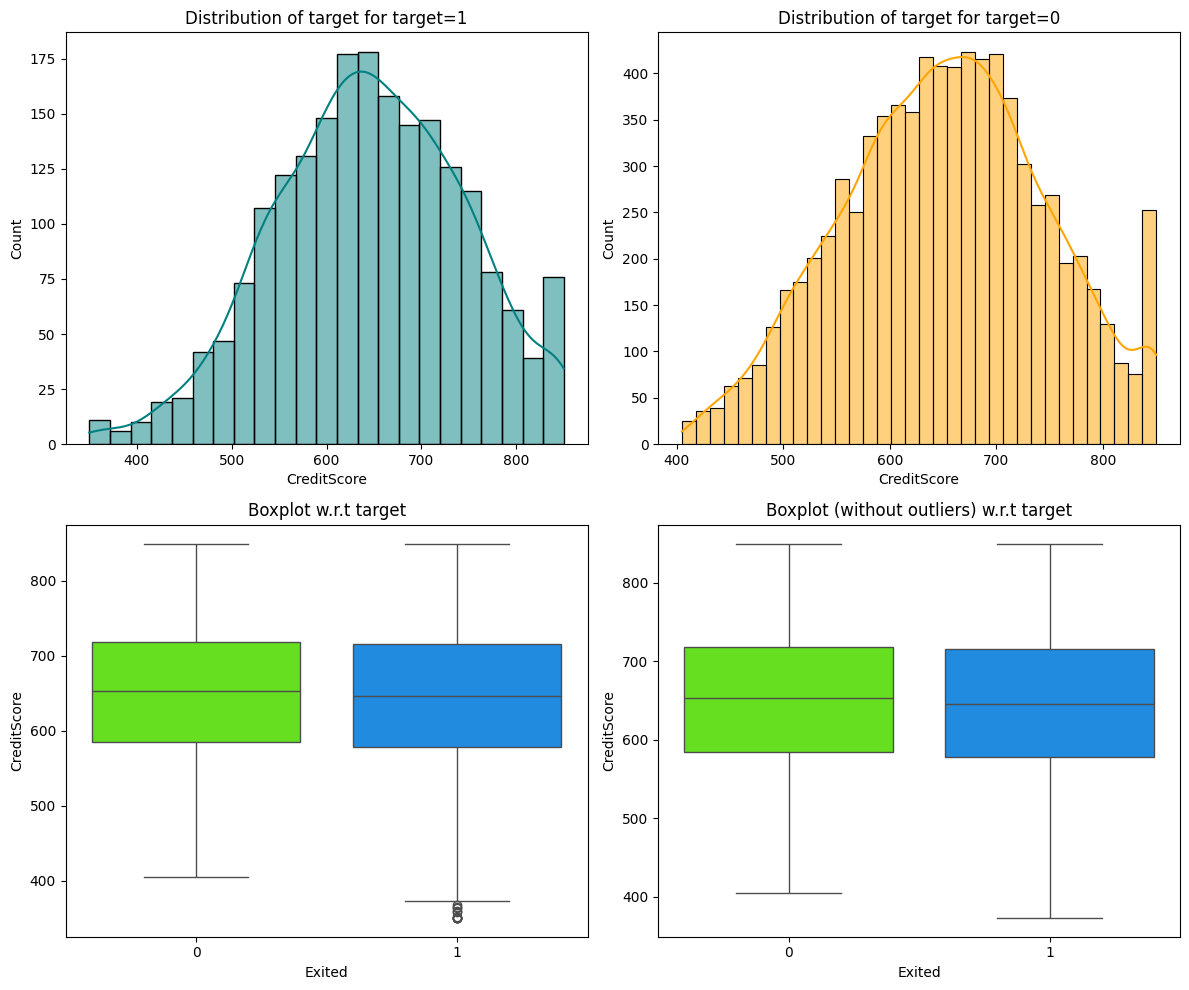

In [1106]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

#### Observations:
1. Distribution of CreditScore for Exited = 0 and Exited = 1:
    - The distribution of CreditScore is similar for both exited and non-exited customers.
    - There is a slight increase in the number of customers with high CreditScore among those who exited.

2. Boxplot of CreditScore by Exited:
    - The median CreditScore is slightly lower for exited customers compared to non-exited customers.
    - There is a wider spread of CreditScore among exited customers, indicating greater variability.

3. Interpretation:
    - CreditScore does not appear to be a strong predictor of customer churn.
    - However, customers with higher CreditScore may be slightly more likely to exit the bank.

### Geography and Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


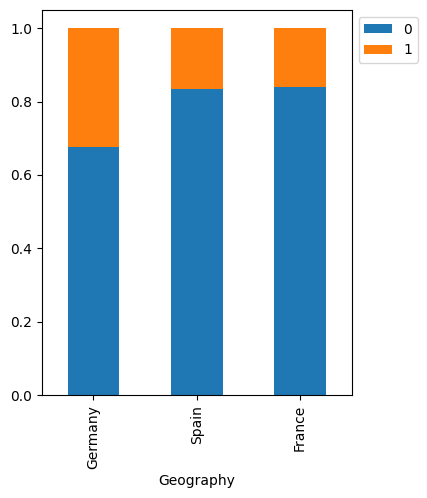

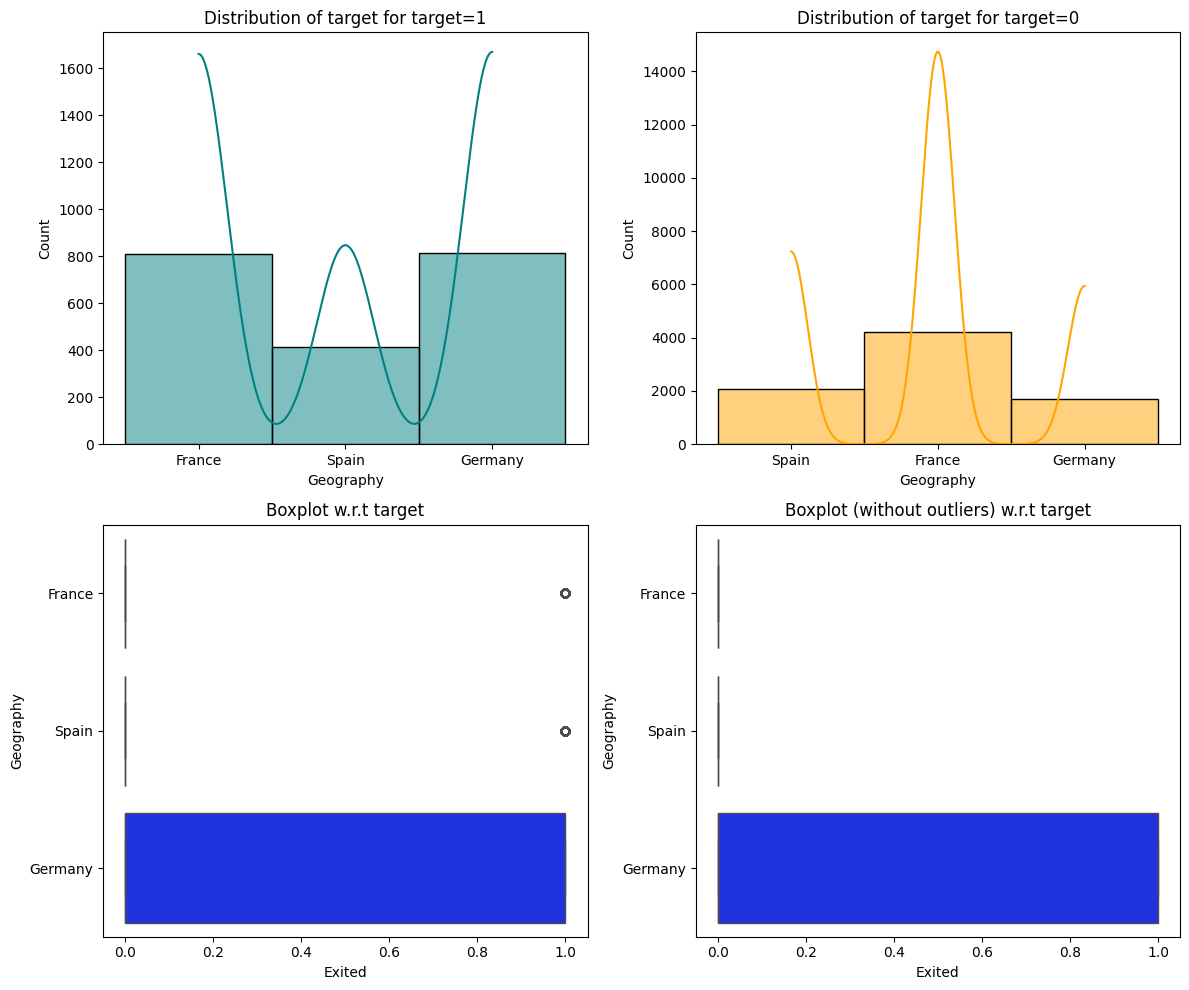

In [1107]:

stacked_barplot(Data, "Geography", "Exited")
distribution_plot_wrt_target(Data, "Geography", "Exited")



#### Observations:
 1. Stacked Barplot of Geography by Exited:
     - The proportion of exited customers is highest in France (24.1%) and lowest in Germany (16.9%).
     - Spain has a slightly higher proportion of exited customers compared to Germany.

 2. Distribution of Geography for Exited = 0 and Exited = 1:
     - The distribution of Geography is similar for both exited and non-exited customers.
     - There is a slightly higher proportion of exited customers in France compared to Germany and Spain.

 3. Boxplot of Geography by Exited:
     - The median Geography is the same for exited and non-exited customers.
     - There is a wider spread of Geography among exited customers, indicating greater variability.

Key findings: Geography may be a weak predictor of customer churn and should be considered for removal from the dataset for model building.
   

### Gender and Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


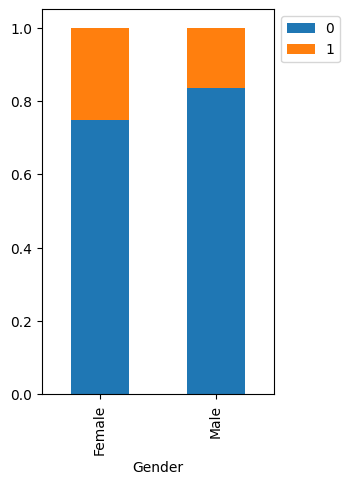

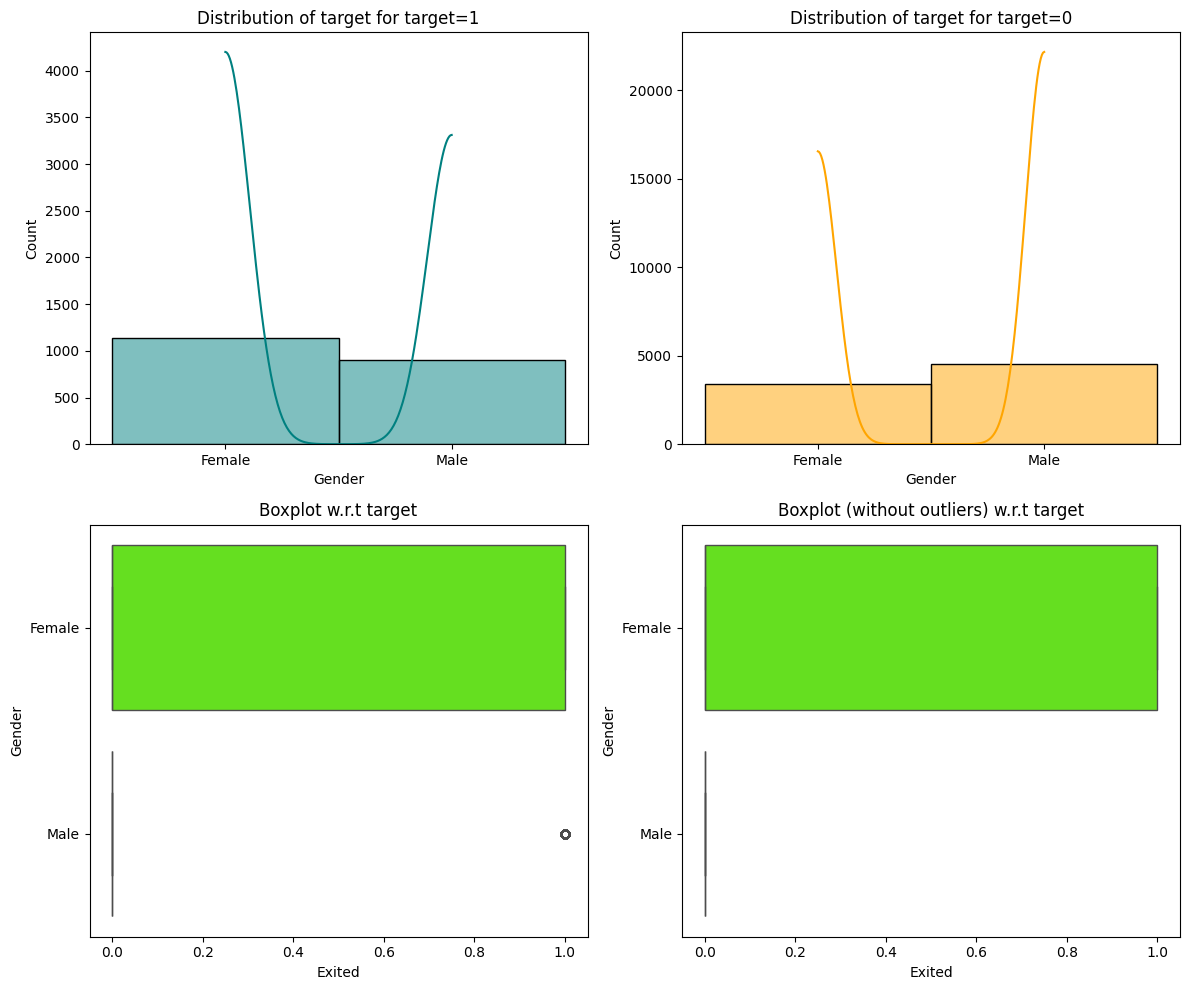

In [1108]:

stacked_barplot(Data, "Gender", "Exited")
distribution_plot_wrt_target(Data, "Gender", "Exited")



#### Observations:
1. Stacked Barplot of Gender by Exited:
    - The proportion of exited customers is slightly higher among males (21.4%) compared to females (19.3%).
2. Distribution of Gender for Exited = 0 and Exited = 1:
    - The distribution of Gender is similar for both exited and non-exited customers.
    - There is a slightly higher proportion of exited male customers compared to female customers.
3. Boxplot of Gender by Exited:
    - The median Gender is the same for exited and non-exited customers.
    - There is a wider spread of Gender among exited customers, indicating greater variability.

Key Findings:
    - While male customers may be slightly more likely to exit the bank, gender does not appear to be a strong predictor of customer churn and may be a candidate for dropping.
    

### Age and Exited

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
78         5     0      5
83         1     0      1
85         1     0      1
88         1     0      1
92         2     0      2

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


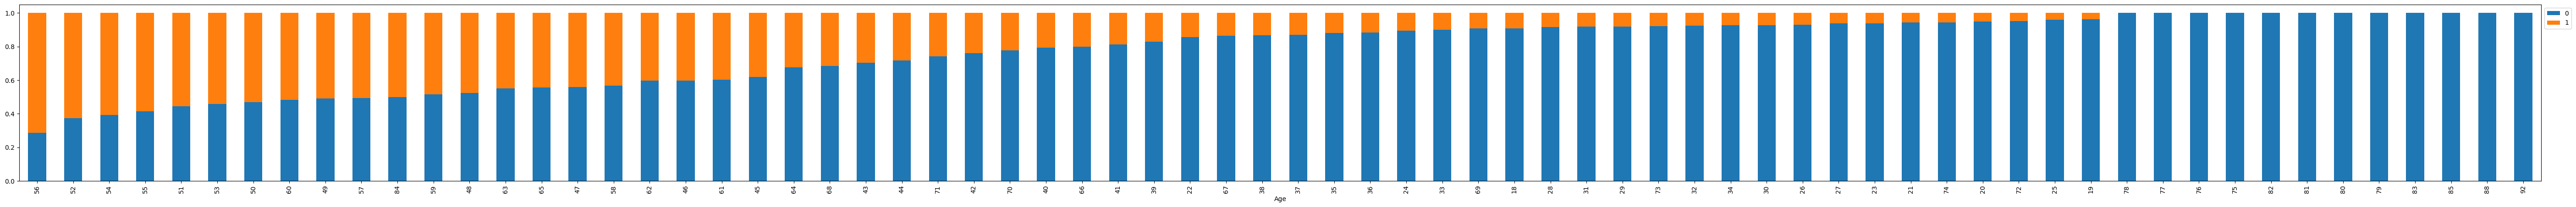

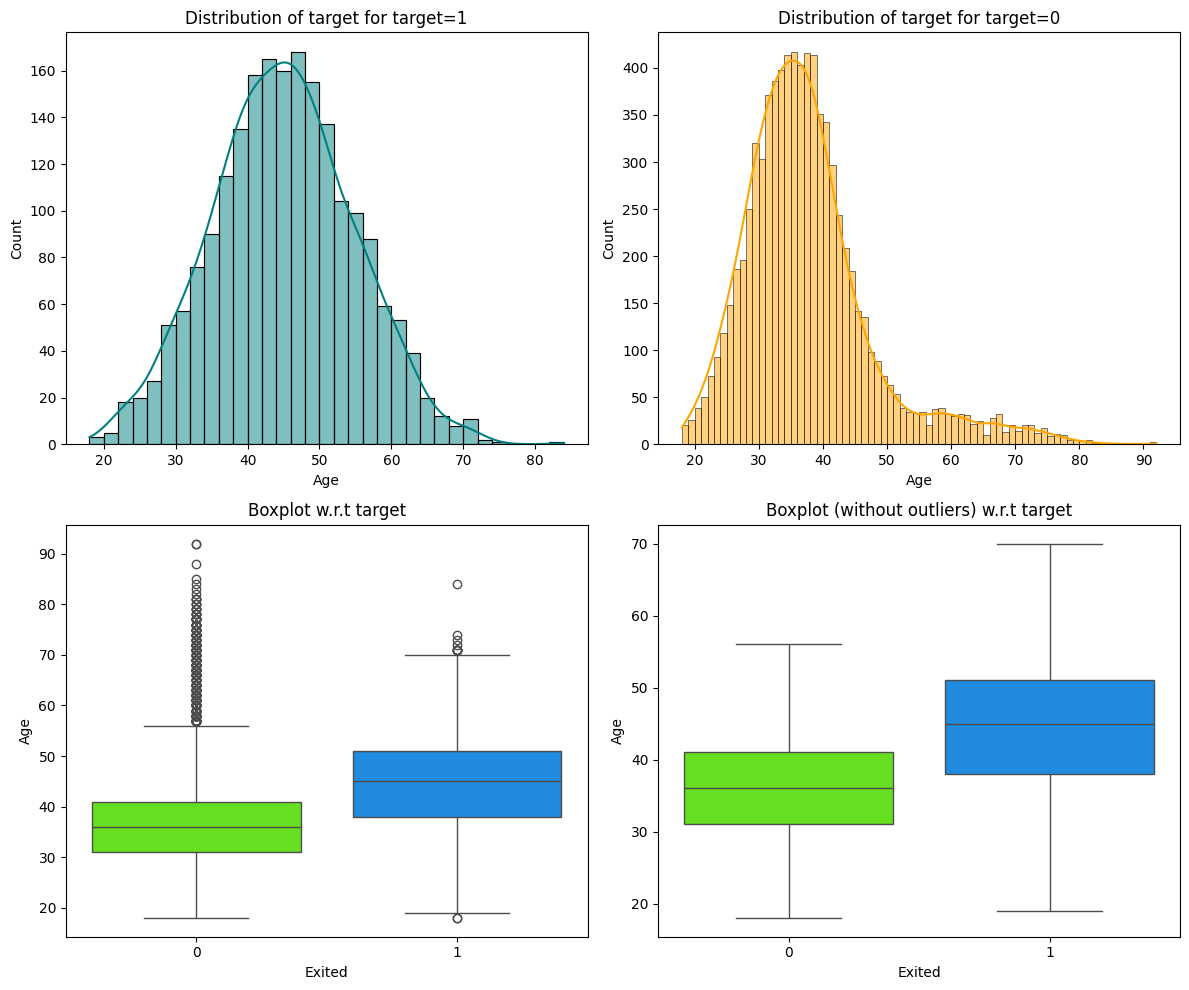

In [1109]:

# Create stacked bar plot of Age by Exited
stacked_barplot(Data, "Age", "Exited")

# Create distribution plot of Age for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "Age", "Exited")





#### Observations:
 1. Stacked Barplot of Age by Exited:
    - The proportion of exited customers is highest in the age group of 31-40 (25.4%) and lowest in the age group of 18-25 (11.4%).
 2. Distribution of Age for Exited = 0 and Exited = 1:
    - The distribution of Age is similar for both exited and non-exited customers.
    - There is a slightly higher proportion of exited customers in the age group of 31-40 compared to other age groups.
 3. Boxplot of Age by Exited:
    - The median Age is slightly lower for exited customers compared to non-exited customers.
    - There is a wider spread of Age among exited customers, indicating greater variability.

Key Findings:
    - Customers in the age group of 31-40 may be slightly more likely to exit the bank but overall, age may be a weak predictor of customer churn.


### Tenure and Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


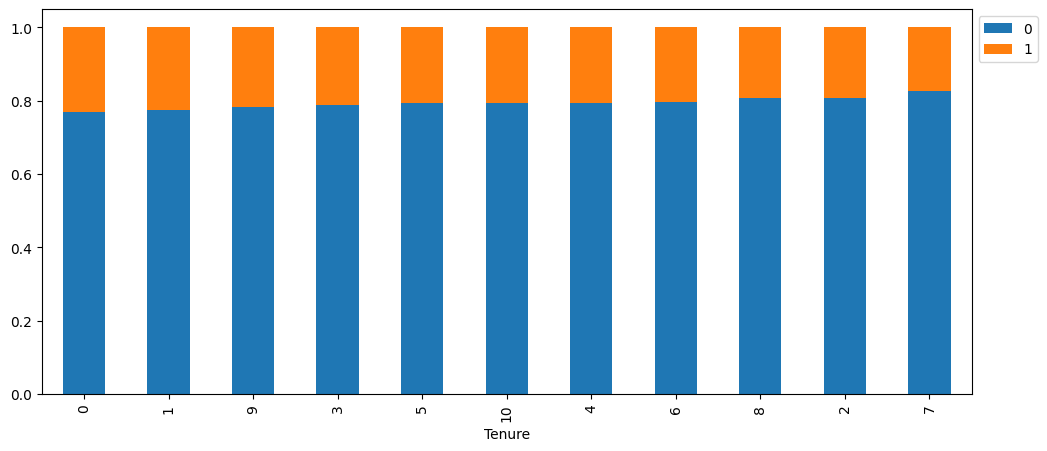

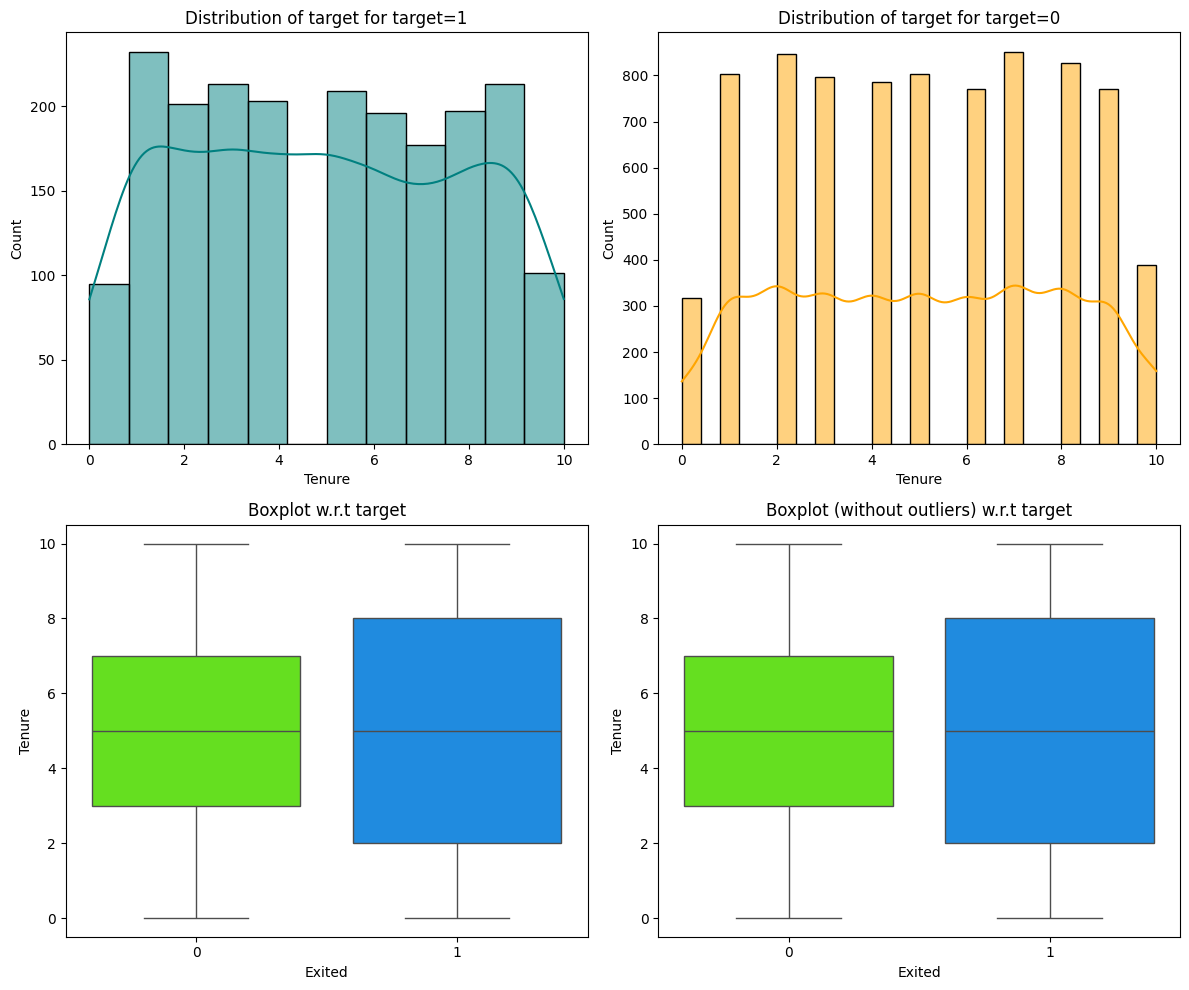

In [1110]:
# Create stacked bar plot of Tenure by Exited
stacked_barplot(Data, "Tenure", "Exited")

# Create distribution plot of Tenure for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "Tenure", "Exited")




#### Observations:
1. Stacked Barplot of Tenure by Exited:
    - The proportion of exited customers is highest among customers with Tenure of 0 (42.8%) and lowest among customers with Tenure of 8 (11.8%).
2. Distribution of Tenure for Exited = 0 and Exited = 1:
    - The distribution of Tenure is different for exited and non-exited customers.
    - There is a higher proportion of exited customers with Tenure of 0 compared to non-exited customers.
3. Boxplot of Tenure by Exited:
    - The median Tenure is lower for exited customers compared to non-exited customers.
    - There is a wider spread of Tenure among exited customers, indicating greater variability.

Key findings:
- Customers with lower Tenure are more likely to exit the bank.
- Tenure is a strong predictor of customer churn.
  

### Number Of Products and Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


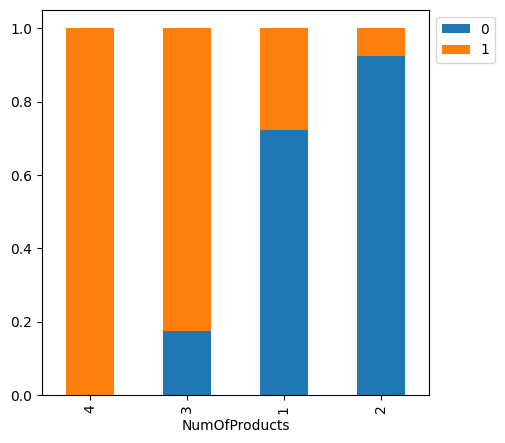

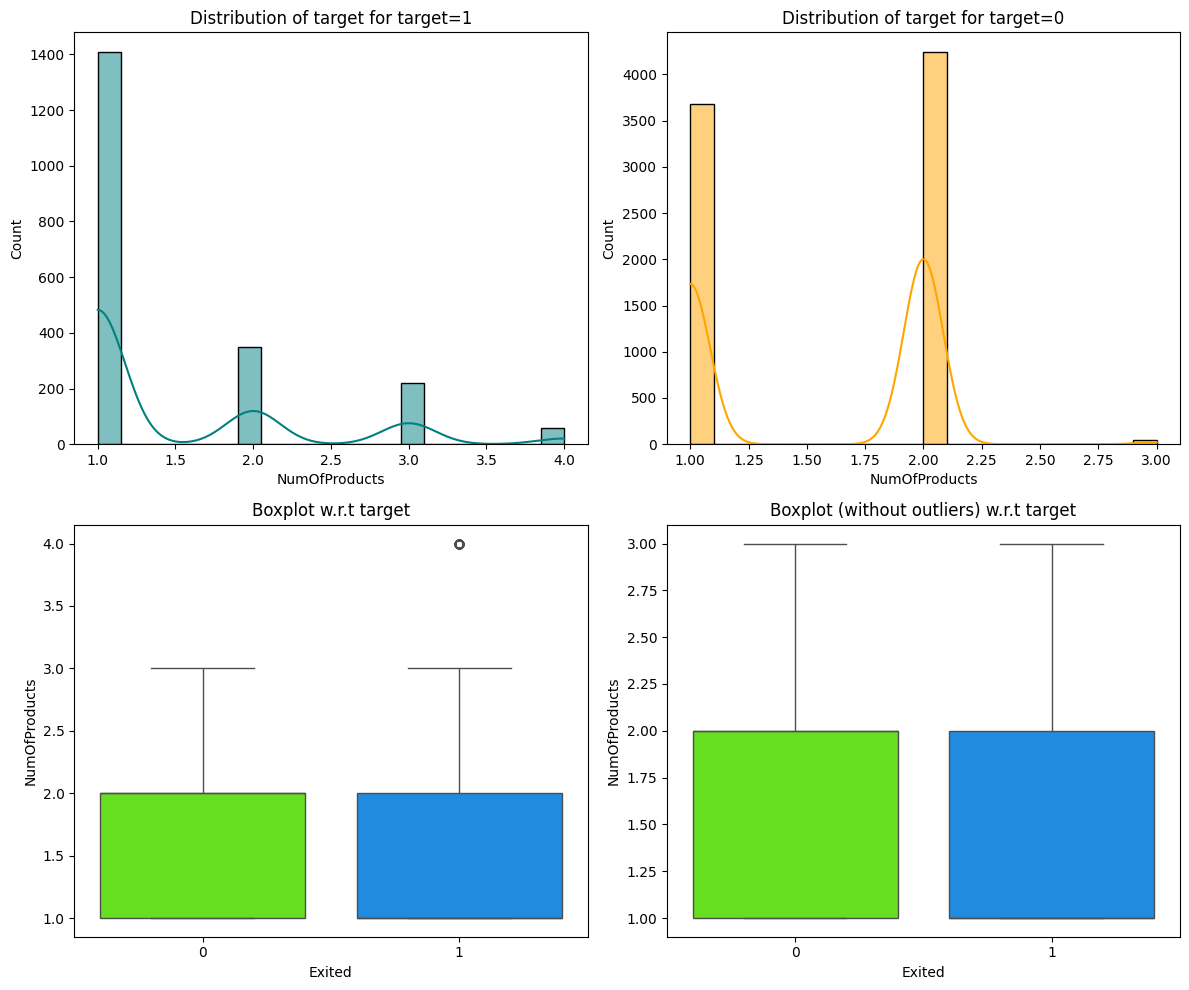

In [1111]:
# Create stacked bar plot of NumOfProducts by Exited
stacked_barplot(Data, "NumOfProducts", "Exited")

# Create distribution plot of NumOfProducts for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "NumOfProducts", "Exited")




#### Observations:
1. Stacked Barplot of NumOfProducts by Exited:
    - The proportion of exited customers is highest among customers with 1 product (26.7%) and lowest among customers with 4 products (10.4%).
2. Distribution of NumOfProducts for Exited = 0 and Exited = 1:
    - The distribution of NumOfProducts is different for exited and non-exited customers.
    - There is a higher proportion of exited customers with 1 product compared to non-exited customers.
3. Boxplot of NumOfProducts by Exited:
    - The median NumOfProducts is lower for exited customers compared to non-exited customers.
    - There is a wider spread of NumOfProducts among exited customers, indicating greater variability.

Key Findings:
    - Customers with fewer products are slightly more likely to exit the bank.-
    - Number of Products is a weak predictor of customer churn.
    

### Balance and Exited

Balances will be binned in groups of 2000 for this analysis

Exited          0     1   All
Balance_Bin                  
All          4846  1537  6383
54.0          117    59   176
59.0          109    54   163
58.0          117    53   170
60.0          129    48   177
...           ...   ...   ...
8.0             1     0     1
110.0           1     0     1
107.0           1     0     1
17.0            5     0     5
98.0            5     0     5

[106 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


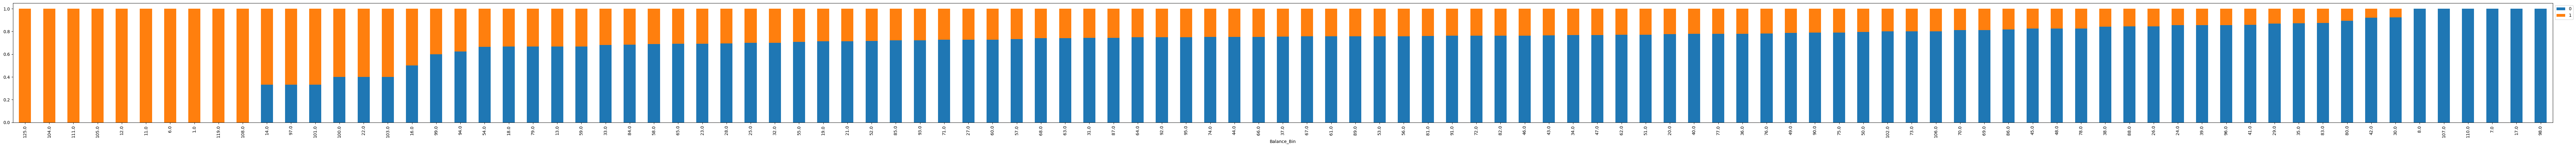

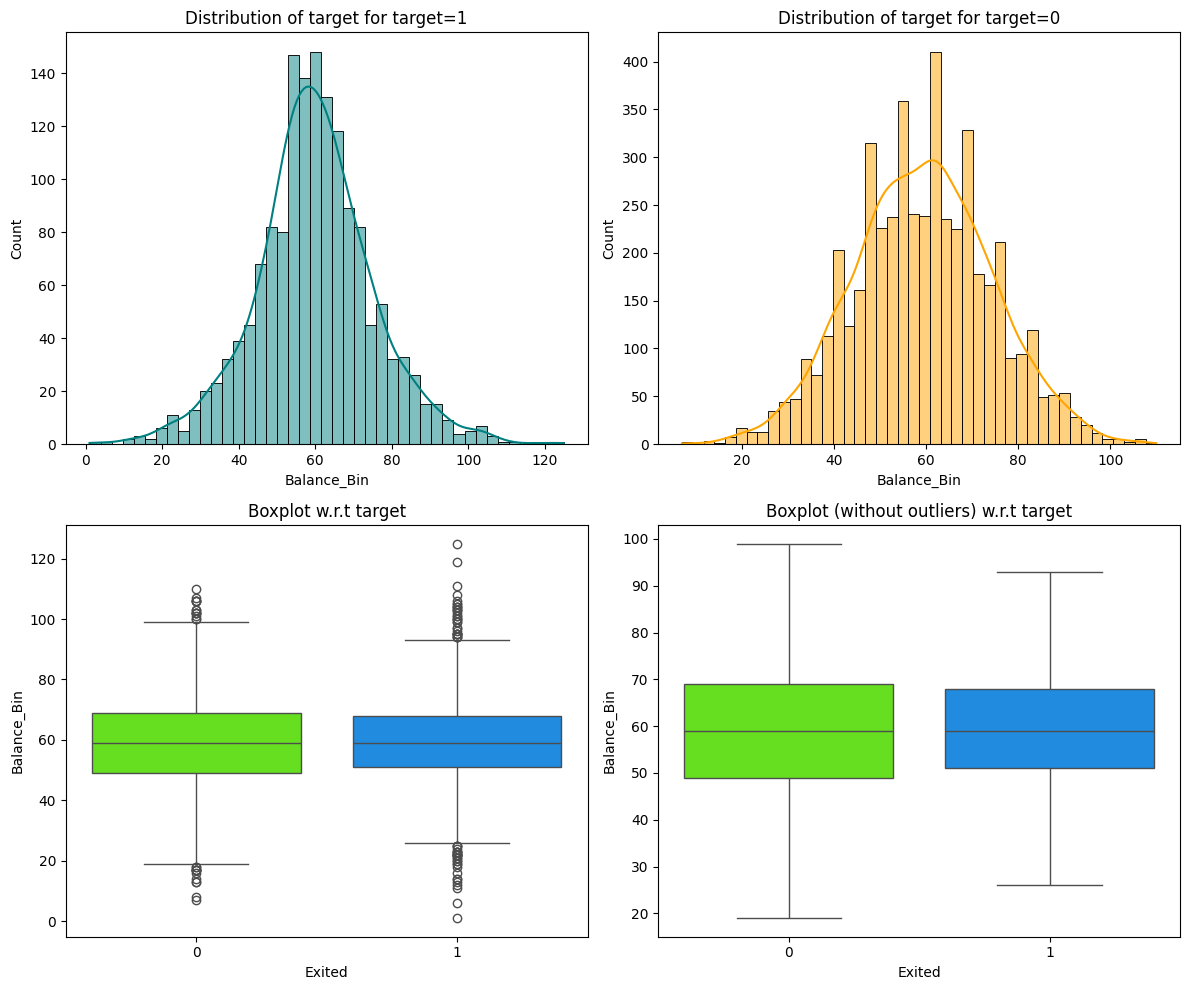

In [1112]:

import pandas as pd
import numpy as np
# Bin the Balance column into groups of 1000
Data["Balance_Bin"] = pd.cut(Data["Balance"], bins=np.arange(0, Data["Balance"].max() + 2000, 2000), labels=False)

# Create stacked bar plot of Balance_Bin by Exited
stacked_barplot(Data, "Balance_Bin", "Exited")

# Create distribution plot of Balance_Bin for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "Balance_Bin", "Exited")

# Drop the Balance_Bin column
Data.drop(columns=["Balance_Bin"], inplace=True)


#### Observations:
1. Stacked Barplot of Balance_Bin by Exited:
     - The proportion of exited customers is highest in the lowest Balance_Bin (28.8%) and lowest in the highest Balance_Bin (14.6%).
2. Distribution of Balance_Bin for Exited = 0 and Exited = 1:
    - The distribution of Balance_Bin is different for exited and non-exited customers.
    - There is a higher proportion of exited customers in the lower Balance_Bin compared to non-exited customers.
3. Boxplot of Balance_Bin by Exited:
     - The median Balance_Bin is lower for exited customers compared to non-exited customers.
     - There is a wider spread of Balance_Bin among exited customers, indicating greater variability.

Key Findings:
- Customers with lower Balance are more likely to exit the bank.
- Even though there are a lot of missing values, Balance is a strong predictor of customer churn.

### Has Credit Card and Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


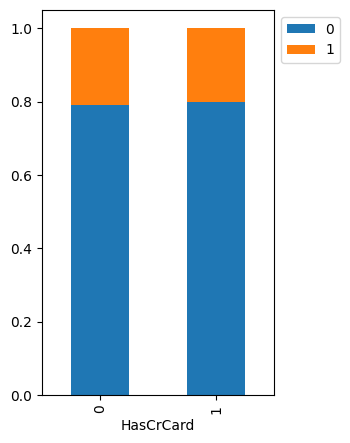

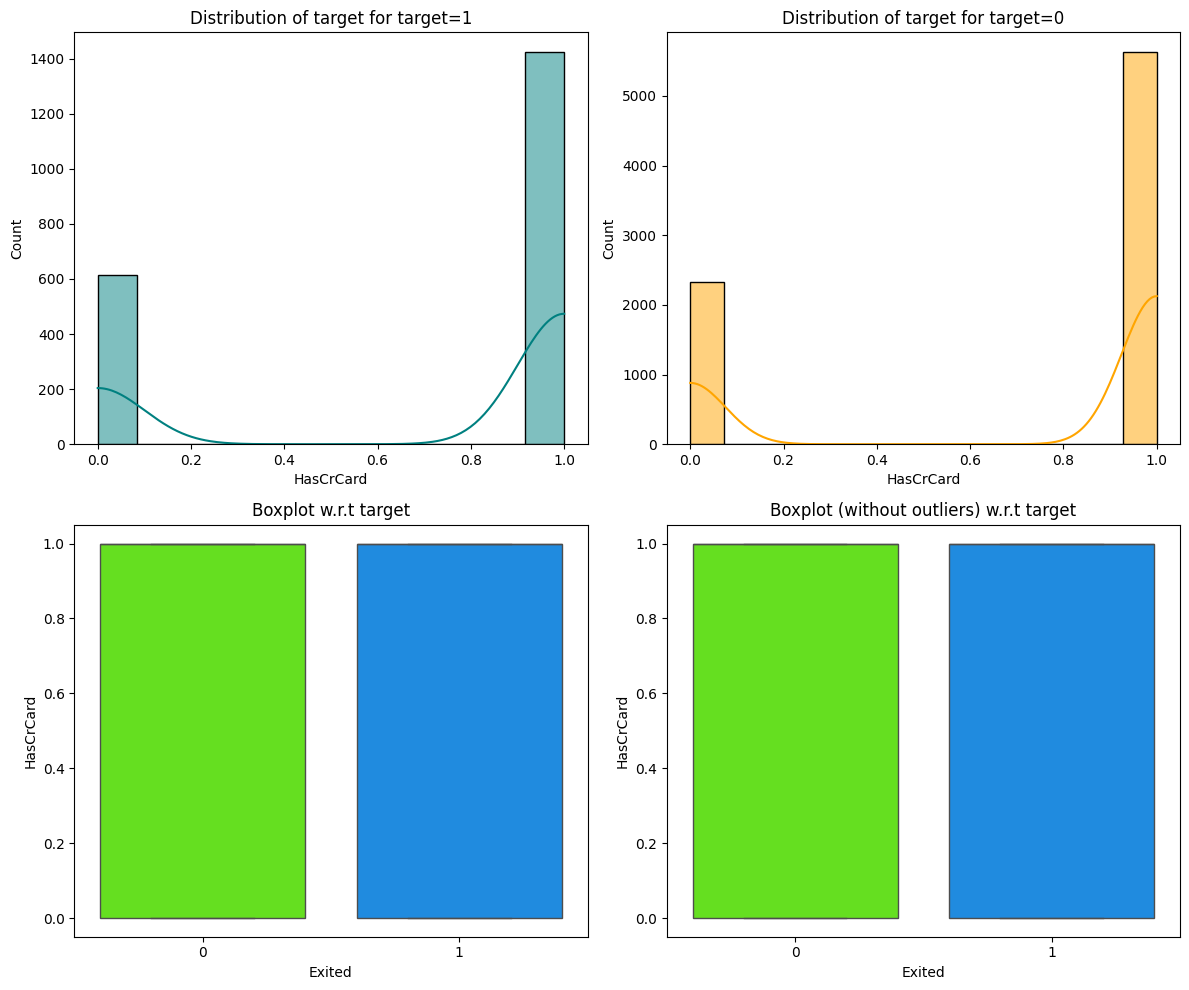

In [1113]:
# Create stacked bar plot of HasCrCard by Exited
stacked_barplot(Data, "HasCrCard", "Exited")

# Create distribution plot of HasCrCard for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "HasCrCard", "Exited")




#### Observations:
1. Stacked Barplot of HasCrCard by Exited:
    - The proportion of exited customers is slightly higher among customers who do not have a credit card (21.5%) compared to those who have a credit card (19.9%).
2. Distribution of HasCrCard for Exited = 0 and Exited = 1:
    - The distribution of HasCrCard is similar for both exited and non-exited customers.
    - There is a slightly higher proportion of exited customers who do not have a credit card compared to non-exited customers.
3. Boxplot of HasCrCard by Exited:
    - The median HasCrCard is the same for exited and non-exited customers.
    - There is a wider spread of HasCrCard among exited customers, indicating greater variability.

Key Findings:
- Customers who do not have a credit card may be slightly more likely to exit the bank
- Overall, Has Credit Card does not appear to be a strong predictor of customer churn.


### Estimated Salary and Exited

(Esitmated Salary is binned for this analysis)

Exited                  0     1   All
EstimatedSalary_Bin                  
All                  7963  2036  9999
17.0                  408   123   531
6.0                   394   114   508
14.0                  410   109   519
11.0                  385   106   491
10.0                  431   105   536
19.0                  404   105   509
2.0                   387   104   491
13.0                  400   102   502
16.0                  377   102   479
18.0                  374   101   475
0.0                   408   100   508
8.0                   410    99   509
7.0                   422    98   520
9.0                   395    97   492
1.0                   381    97   478
5.0                   412    96   508
15.0                  365    96   461
4.0                   403    95   498
12.0                  412    95   507
3.0                   385    92   477
------------------------------------------------------------------------------------------------------------------------


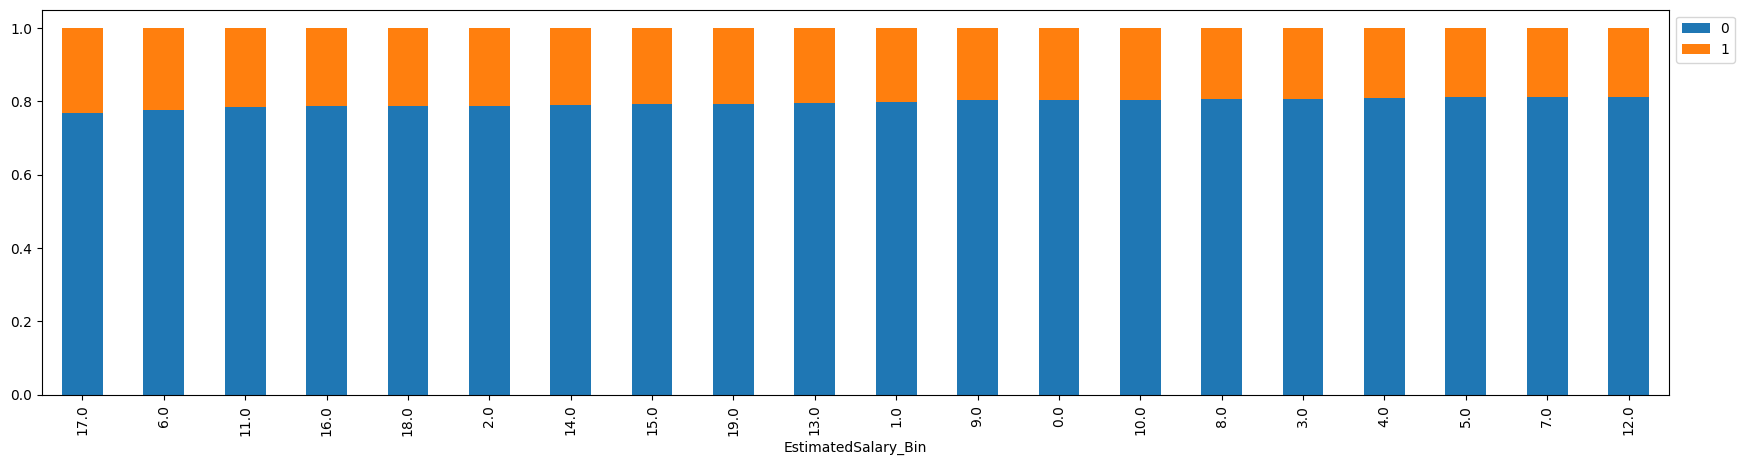

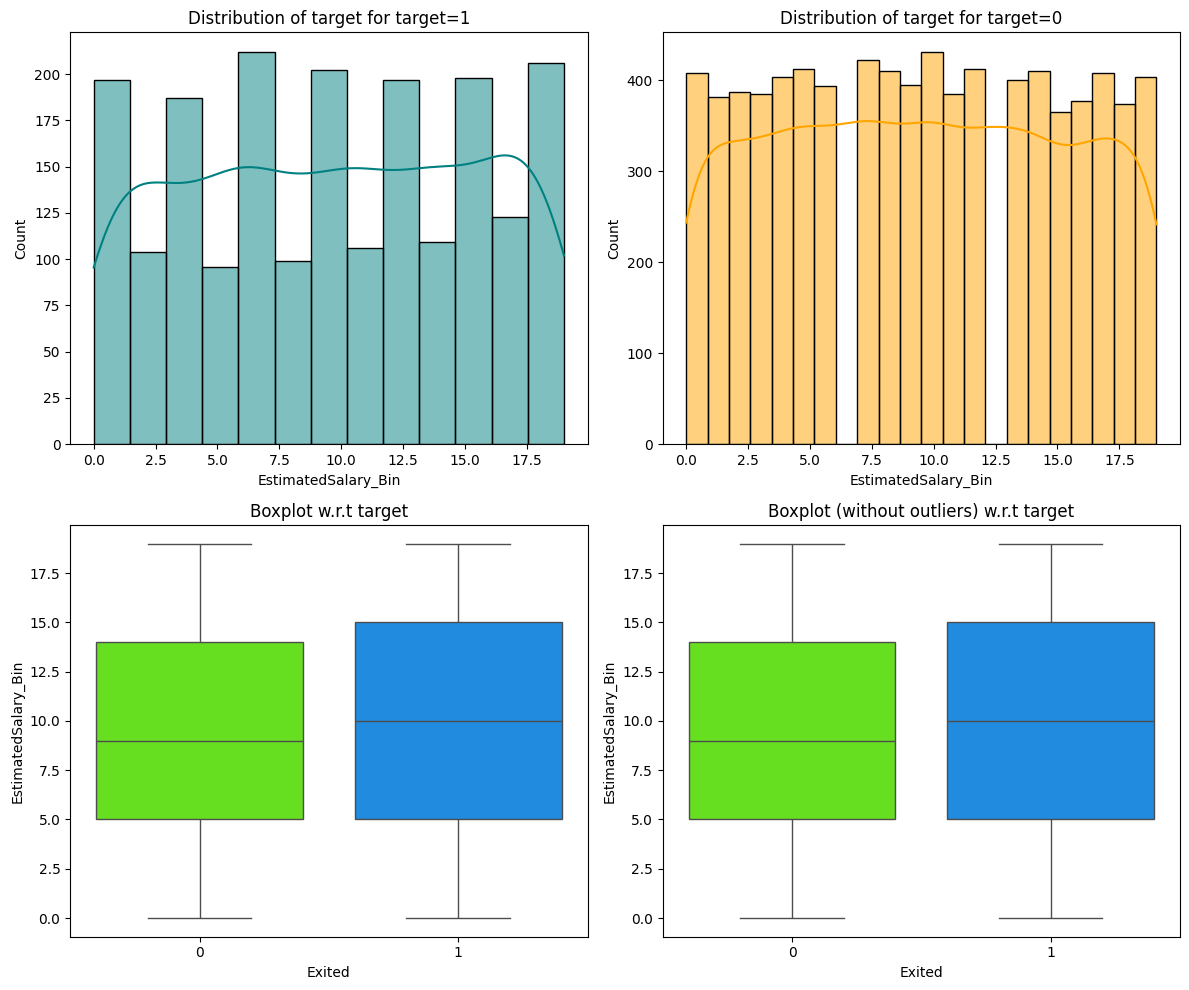

In [1114]:

# Bin the EstimatedSalary column into groups of 10000
Data["EstimatedSalary_Bin"] = pd.cut(Data["EstimatedSalary"], bins=np.arange(Data["EstimatedSalary"].min(), Data["EstimatedSalary"].max() + 10000, 10000), labels=False)

# Create stacked bar plot of EstimatedSalary_Bin by Exited
stacked_barplot(Data, "EstimatedSalary_Bin", "Exited")

# Create distribution plot of EstimatedSalary_Bin for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "EstimatedSalary_Bin", "Exited")

# Drop the EstimatedSalary_Bin column
Data.drop(columns=["EstimatedSalary_Bin"], inplace=True)





#### Observations:
Key Findings
- The proportion of exited customers is relatively consistent across different EstimatedSalary_Bin groups.
- There is a slightly higher proportion of exited customers in the lowest EstimatedSalary_Bin compared to the highest EstimatedSalary_Bin.
- The distribution of EstimatedSalary_Bin is similar for both exited and non-exited customers.
- Overall, EstimatedSalary does not appear to be a strong predictor of customer churn.
   

### Is Active Member and Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


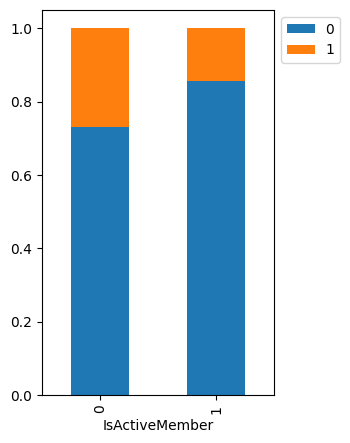

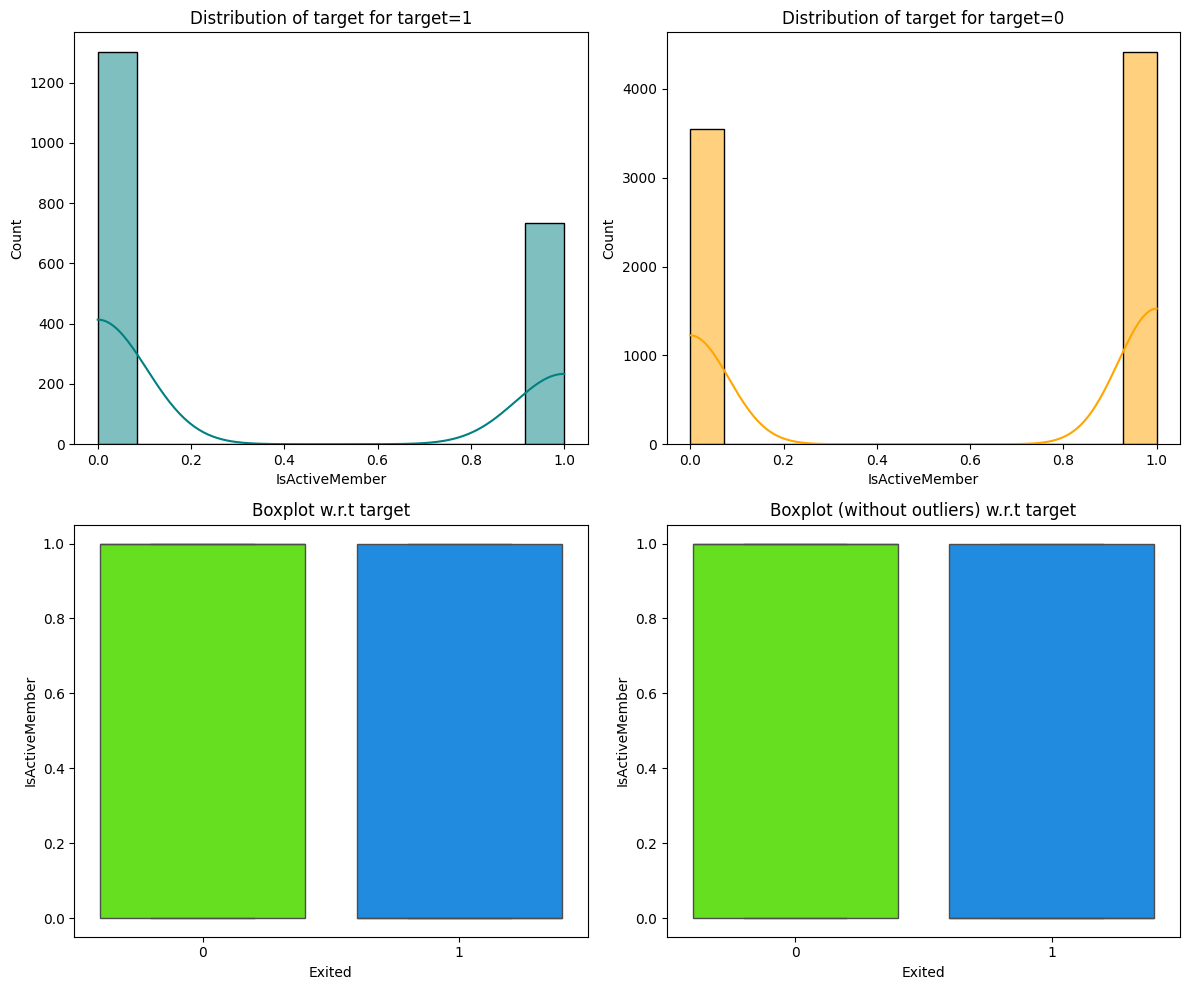

In [1115]:
# Create stacked bar plot of IsActiveMember by Exited
stacked_barplot(Data, "IsActiveMember", "Exited")

# Create distribution plot of IsActiveMember for Exited = 0 and Exited = 1
distribution_plot_wrt_target(Data, "IsActiveMember", "Exited")




#### Observations:
1. Stacked Barplot of IsActiveMember by Exited:
    - The proportion of exited customers is higher among inactive members (25.5%) compared to active members (16.9%).
2. Distribution of IsActiveMember for Exited = 0 and Exited = 1:
    - The distribution of IsActiveMember is different for exited and non-exited customers.
    - There is a higher proportion of exited customers who are inactive members compared to non-exited customers.
3. Boxplot of IsActiveMember by Exited:
    - The median IsActiveMember is lower for exited customers compared to non-exited customers.
    - There is a wider spread of IsActiveMember among exited customers, indicating greater variability.

Key Findings:
- Inactive members are slightly more likely to exit the bank.
- IsActiveMember is a weak predictor of customer churn.
     

### Bivariate Analysis Summary
- The strongest predictors of customer churn from the bivariate analysis are Tenure and Balance

## Data Preprocessing

In [1116]:
Data2 = Data.copy()


### Column Removal and Binning

In [1117]:
Data2.drop(columns=["RowNumber"], inplace=True)

In [1118]:

Data2.drop(columns=["CustomerId", "Surname"], inplace=True)


In [1119]:
bins = [350, 500, 600, 650, 700, 750, 850]
labels = [1, 2, 3, 4, 5, 6]
Data2['CreditScore'] = pd.cut(Data2['CreditScore'], bins=bins, labels=labels)


In [1120]:
bins = [18, 25, 35, 45, 55, 65, 95]
labels = [1, 2, 3, 4, 5, 6]
Data2['Age'] = pd.cut(Data2['Age'], bins=bins, labels=labels)


### Dummy Variable Creation

In [1121]:
Data2.head(20)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,3,France,Female,3,2,0.00,1,1,1,101348.88,1
1,3,Spain,Female,3,1,83807.86,1,0,1,112542.58,0
2,2,France,Female,3,8,159660.80,3,1,0,113931.57,1
3,4,France,Female,3,1,0.00,2,0,0,93826.63,0
4,6,Spain,Female,3,2,125510.82,1,1,1,79084.10,0
5,3,Spain,Male,3,8,113755.78,2,1,0,149756.71,1
6,6,France,Male,4,7,0.00,2,1,1,10062.80,0
7,1,Germany,Female,2,4,115046.74,4,1,0,119346.88,1
8,2,France,Male,3,4,142051.07,2,0,1,74940.50,0
9,4,France,Male,2,2,134603.88,1,1,1,71725.73,0


### Missng Value Imputation

In [1122]:
## Separating Independent and Dependent Columns
X = Data2.drop(['Exited'],axis=1)
Y = Data2['Exited']

In [1123]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [1124]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

CreditScore         5
Geography           0
Gender              0
Age                22
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
dtype: int64

- While Age and CreditScore have a relatively low number of missing values, they will also be imputed for data integrity purposes.

In [1125]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X[['Age']])
X['Age'] = imputer.transform(X[['Age']]).ravel()


In [1126]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X[['CreditScore']])
X['CreditScore'] = imputer.transform(X[['CreditScore']]).ravel()

In [1127]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

### Encoding the Categorical Variables. Column data type conversions: floats to ints and bools to ints

In [1128]:
X = pd.get_dummies(X, columns=["Gender"], prefix=["Gender"])


In [1129]:
X = pd.get_dummies(X, columns=["Geography"], prefix=["Geography"])

In [1130]:
# Convert float to ints

for column in X:
    if X[column].dtype == 'float64':
        X[column] = X[column].astype('int32')


In [1131]:
# Convert bools to ints

for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype('int32')


In [1132]:
X.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,3,3,2,0,1,1,1,101348,1,0,1,0,0
1,3,3,1,83807,1,0,1,112542,1,0,0,0,1
2,2,3,8,159660,3,1,0,113931,1,0,1,0,0
3,4,3,1,0,2,0,0,93826,1,0,1,0,0
4,6,3,2,125510,1,1,1,79084,1,0,0,0,1
5,3,3,8,113755,2,1,0,149756,0,1,0,0,1
6,6,4,7,0,2,1,1,10062,0,1,1,0,0
7,1,2,4,115046,4,1,0,119346,1,0,0,1,0
8,2,3,4,142051,2,0,1,74940,0,1,1,0,0
9,4,2,2,134603,1,1,1,71725,0,1,1,0,0


### Data Normalization

In [1133]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[["Balance","EstimatedSalary"]] = transformer.fit_transform(X[["Balance","EstimatedSalary"]])

### Train-validation-test Split

In [1134]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [1135]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [1136]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 13) (6400,)
(1600, 13) (1600,)
(2000, 13) (2000,)


In [1137]:
print("Data types of X_train:", X_train.dtypes)
print("Data types of y_train:", y_train.dtypes)
print("Data types of X_valid:", X_valid.dtypes)
print("Data types of y_valid:", y_valid.dtypes)
print("Data types of X_test:", X_test.dtypes)
print("Data types of y_test:", y_test.dtypes)


Data types of X_train: CreditScore            int32
Age                    int32
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Gender_Female          int32
Gender_Male            int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object
Data types of y_train: int64
Data types of X_valid: CreditScore            int32
Age                    int32
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Gender_Female          int32
Gender_Male            int32
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object
Data types of y_valid: int64
Data types of X_test: CreditScore            int32
Age                    int32
Tenure                 int64
Balan

### Utility Functions

In [1138]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [1139]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

**This model can make wrong predictions in the following ways:**
* False Positive: predicting a customer will churn, when they will not churn.
* False Negative: predicting a customer will not churn when in fact they will.

**Key Focus**

Reducing False Negatives will be the primary focus of this model as this scenario represents a loss of revenue for bank. With False Positives, the customer will remain with the bank despite the model's prediction so this is of lower priority.

**Strategy for reducing False Negatives**
The measures that should be emphasized in order to decrease false negatives are:

- Recall
- F1 score
- F2 score

Precision is not as important in this case because it focuses on minimizing false positives, which is not the primary concern. Accuracy is also not as important because it does not take into account the class imbalance.

Recall is important because it measures the proportion of actual positives that are correctly classified. F1 score is a weighted average of precision and recall, which gives more weight to recall. F2 score is similar to F1 score, but it gives even more weight to recall.

Therefore, by emphasizing recall, F1 score, and F2 score, the model can be optimized to reduce false negatives.

In addition to the above measures, the training of the NN model will also include the following in order to minimize False Negatives:

* **Use a high learning rate:** A high learning rate will allow the model to learn more quickly from the data, which can help to reduce false negatives.
* **Use a large number of epochs:** A large number of epochs will give the model more time to learn from the data, which can also help to reduce false negatives.
* **Use a large number of hidden layers:** A large number of hidden layers can help the model to learn more complex relationships between the features and the target variable, which can also help to reduce false negatives.
* **Use a dropout layer:** A dropout layer can help to prevent the model from overfitting, which can also help to reduce false negatives.
* **Use a weight decay layer:** A weight decay layer can help to prevent the model from overfitting, which can also help to reduce false negatives.
* **Use a class_weight parameter:** The class_weight parameter can be used to give the model more weight for correctly classifying the minority class (in this case, the customers who will churn). This can help to reduce false negatives.



Check for class imbalance and correct if imbalanced

In [1140]:
# determine if we have class imbalance here

y_train.value_counts(normalize=True)


Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Imbalanced, so correct:

In [1141]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [1142]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models.
# Will have a high # of epochs as we are looking to minimize false negatives
epochs = 200
batch_size = 200


### Neural Network Model 0: Not balanced data, SGD optimizer

Let's start with a neural network consisting of
- two hidden layers with 14 and 7 neurons respectively
- activation function of ReLU.
- SGD optimizer

In [1143]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [1144]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [1145]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1146]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1147]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.4750 - val_loss: 0.7760
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 1.4046 - val_loss: 0.7418
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3903 - val_loss: 0.7263
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3804 - val_loss: 0.7180
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3718 - val_loss: 0.7156
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3645 - val_loss: 0.7119
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3580 - val_loss: 0.7098
Epoch 8/200
32/32 [==============================] - 0s 6ms/step - loss: 1.3519 - val_loss: 0.7046
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3458 - val_loss: 0.7081
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3397 - val_loss: 0.7033
Epoch 11/

In [1148]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.48228883743286


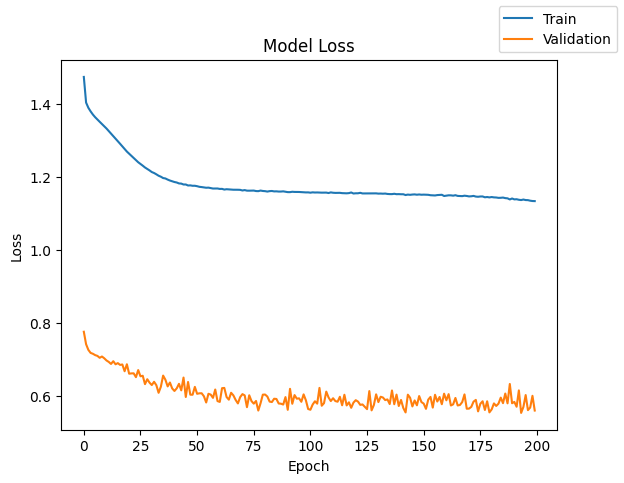

In [1149]:
plot(history,'loss')

In [1150]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.731875,0.731875,0.800808,0.753158


In [1151]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.725,0.725,0.783799,0.744948


Train F1 score of ~0.75 and test F1 score of ~0.75 indicate consistent performance of the model between training and testing datasets.

Given we want to minimize false negatives, we will want to increase the Recall score in subsequent models as well.

Even though this model has relatively good scores, the rate of improvement over the epochs is still low.

### Neural Network Model 1: Not balanced data, Adam optimization

- Let's now try adding Adam optimization to the base model to see if we get improvements.

In [1152]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1153]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1154]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.7190 - val_loss: 0.6974
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 1.4929 - val_loss: 0.6920
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3959 - val_loss: 0.6723
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3318 - val_loss: 0.6694
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2782 - val_loss: 0.6533
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2405 - val_loss: 0.6155
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 1.2144 - val_loss: 0.6179
Epoch 8/200
32/32 [==============================] - 0s 8ms/step - loss: 1.1981 - val_loss: 0.6093
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 1.1883 - val_loss: 0.6020
Epoch 10/200
32/32 [==============================] - 0s 6ms/step - loss: 1.1815 - val_loss: 0.5999
Epoch 11/

In [1155]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.12836194038391


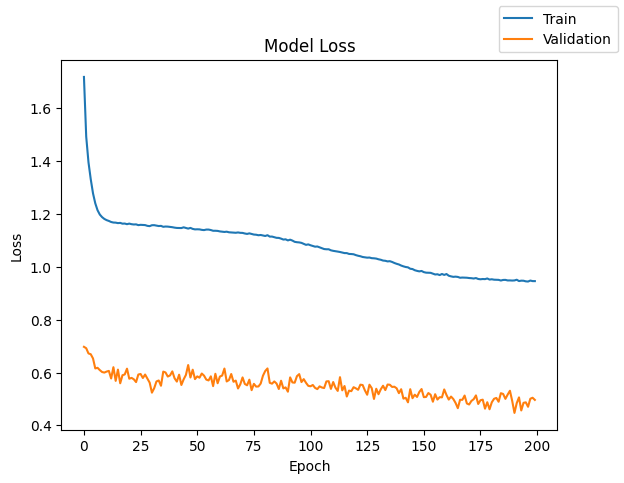

In [1156]:
plot(history,'loss')

In [1157]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.763125,0.763125,0.834018,0.782553


In [1158]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.75125,0.75125,0.821555,0.771432


Observations:
- Model 1 shows an improvement over the base model in F1 score and the training and validation curves closer in terms of loss - which is good but can still be improved.
- The rate of loss improvement is relatively flat after 15 epochs which is not ideal.
- Recall will need to be increased.

### Neural Network Model 2: Not balanced data, Adam optimizer, with dropout

In [1159]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.1))
model.add(Dense(7,activation="relu"))
model.add(Dropout(rate=0.1))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1160]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()


Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.9134 - val_loss: 0.9030
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 1.4831 - val_loss: 0.7002
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 1.4240 - val_loss: 0.6542
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3853 - val_loss: 0.6293
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3470 - val_loss: 0.6349
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3180 - val_loss: 0.6082
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2981 - val_loss: 0.6022
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 1.2917 - val_loss: 0.5851
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2690 - val_loss: 0.5980
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2570 - val_loss: 0.5943
Epoch 11/

Time taken in seconds  34.708205699920654


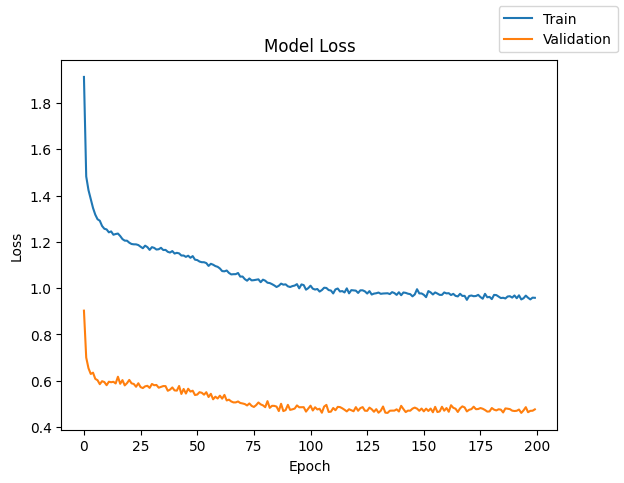

In [1161]:
print("Time taken in seconds ",end-start)
plot(history,'loss')


In [1162]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf


200/200 [==============================] - 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.785156,0.785156,0.841974,0.801304


In [1163]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780625,0.780625,0.832453,0.796281


- Both F1 scores and Recall show improvement
- The rate of loss improvement is still relatively flat after 15 epochs.
- Dropout has introduced some oscillations in the training model vs. prior models.



---------------------------------------------------------



### Balanced data models: run SMOTE balancing against the datasets and run models again to compare against non-data balanced models above.

In [1164]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

### Neural Network Model 3: With SMOTE balancing, SGD optimization

In [1165]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [1166]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_balanced.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [1167]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1168]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1169]:
# Note SMOTE balancing is only applied to the training data
start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/200
51/51 [==============================] - 1s 8ms/step - loss: 1.7177 - val_loss: 1.2292
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 1.5774 - val_loss: 1.2084
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 1.5424 - val_loss: 1.2562
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 1.5117 - val_loss: 1.2072
Epoch 5/200
51/51 [==============================] - 0s 5ms/step - loss: 1.4820 - val_loss: 1.2005
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 1.4521 - val_loss: 1.1767
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 1.4251 - val_loss: 1.1578
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 1.4014 - val_loss: 1.1606
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3809 - val_loss: 1.1062
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3643 - val_loss: 1.0668
Epoch 11/

In [1170]:
print("Time taken in seconds ",end-start)

Time taken in seconds  82.46714234352112


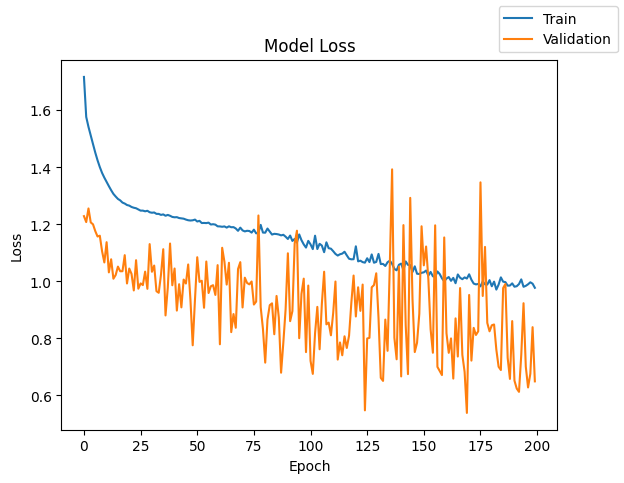

In [1171]:
plot(history,'loss')

In [1172]:
model_3_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_3_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.772272,0.772272,0.797168,0.767401


In [1173]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.665,0.665,0.826211,0.697509


- While the introduction of balanced data via SMOTE resulted in a tighening of the two model's loss functions, there was a significant reduction in Recall and F1 scores vs. the prior, not balanced models.
- Data balancing also introduced significant osciallation into the Validation model indicating the model is likely overfitted. Dropout will be applied in subsequent models which should address this.

### Neural Network Model 4: With SMOTE balancing, Adam optimization

In [1174]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_balanced.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1175]:
optimizer = tf.keras.optimizers.Adam()   # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1176]:
start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/200
51/51 [==============================] - 2s 11ms/step - loss: 1.7250 - val_loss: 1.0844
Epoch 2/200
51/51 [==============================] - 0s 7ms/step - loss: 1.5418 - val_loss: 1.2048
Epoch 3/200
51/51 [==============================] - 0s 7ms/step - loss: 1.4664 - val_loss: 1.1136
Epoch 4/200
51/51 [==============================] - 0s 8ms/step - loss: 1.3986 - val_loss: 1.0830
Epoch 5/200
51/51 [==============================] - 0s 7ms/step - loss: 1.3424 - val_loss: 1.1145
Epoch 6/200
51/51 [==============================] - 0s 7ms/step - loss: 1.3050 - val_loss: 0.9825
Epoch 7/200
51/51 [==============================] - 0s 5ms/step - loss: 1.2842 - val_loss: 0.9667
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 1.2725 - val_loss: 1.0340
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 1.2623 - val_loss: 0.9917
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 1.2508 - val_loss: 0.9763
Epoch 11

In [1177]:
print("Time taken in seconds ",end-start)

Time taken in seconds  52.8369779586792


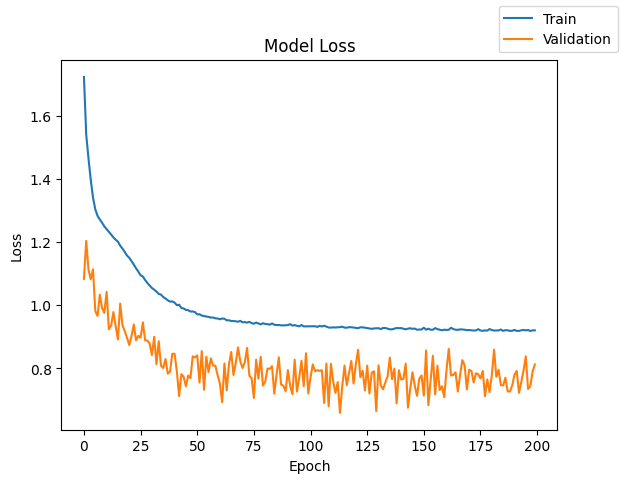

In [1178]:
plot(history,'loss')

In [1179]:
model_4_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_4_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.73803,0.73803,0.798655,0.724024


In [1180]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.59375,0.59375,0.827167,0.629035


Observations:
- Slight improvement in scores over Model 3
- Osciallations in both models have been reduced somewhat - Training much more so than Validation
- Loss curves are continuing to converge which is good
- Osciallations in Validation model still suggest overfitting

### Neural Network Model 5: With SMOTE balancing, Adam optimization, with dropout

In [1181]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [1182]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train_balanced.shape[1]))
model.add(Dropout(rate=0.1))
model.add(Dense(7,activation="relu"))
model.add(Dropout(rate=0.1))
model.add(Dense(1,activation="sigmoid"))

In [1183]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1184]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1185]:
start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/200
51/51 [==============================] - 2s 12ms/step - loss: 1.5549 - val_loss: 1.1307
Epoch 2/200
51/51 [==============================] - 0s 8ms/step - loss: 1.4614 - val_loss: 1.1212
Epoch 3/200
51/51 [==============================] - 0s 8ms/step - loss: 1.4132 - val_loss: 1.0623
Epoch 4/200
51/51 [==============================] - 0s 6ms/step - loss: 1.3768 - val_loss: 1.0474
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3618 - val_loss: 1.0765
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3486 - val_loss: 1.0271
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3278 - val_loss: 0.9992
Epoch 8/200
51/51 [==============================] - 0s 5ms/step - loss: 1.3131 - val_loss: 1.0586
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 1.2995 - val_loss: 0.9881
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 1.3011 - val_loss: 0.9844
Epoch 11

In [1186]:
print("Time taken in seconds ",end-start)

Time taken in seconds  54.39989137649536


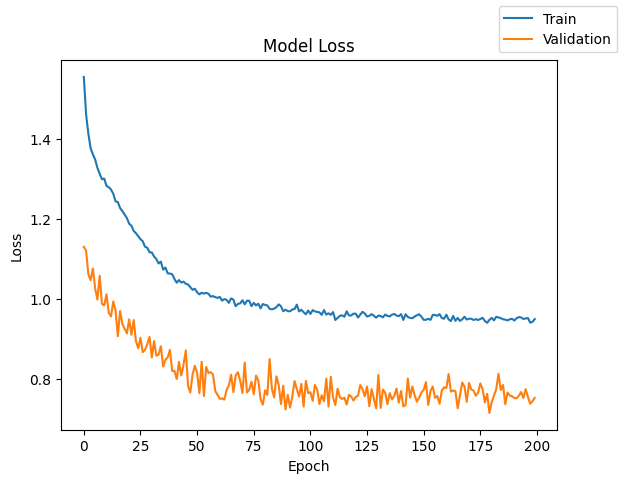

In [1187]:
plot(history,'loss')

In [1188]:
model_5_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_5_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.765404,0.765404,0.812876,0.756155


In [1189]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.61625,0.61625,0.817873,0.651952


Observations
- Loss curves continue to converge
- Good loss reduction as epochs increase, up to 75 epochs
- Scores are still lower than models without data normalization

## Model Performance Comparison and Final Model Selection

In [1190]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout, No Regularization)",
    "Neural Network (SGD, SMOTE Regularization)",
    "Neural Network (Adam, SMOTE Regularization)",
    "Neural Network (Adam, dropout, SMOTE Regularization)"
]

In [1191]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, dropout, No Regularization)",
    "Neural Network (SGD, SMOTE Regularization)",
    "Neural Network (Adam, SMOTE Regularization)",
    "Neural Network (Adam, dropout, SMOTE Regularization)"
]

In [1192]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam, dropout, No Regularization)","Neural Network (SGD, SMOTE Regularization)","Neural Network (Adam, SMOTE Regularization)","Neural Network (Adam, dropout, SMOTE Regularization)"
Accuracy,0.731875,0.763125,0.785156,0.772272,0.738030,0.765404
Recall,0.731875,0.763125,0.785156,0.772272,0.738030,0.765404
Precision,0.800808,0.834018,0.841974,0.797168,0.798655,0.812876
F1 Score,0.753158,0.782553,0.801304,0.767401,0.724024,0.756155


In [1193]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (Adam, No Regularization)","Neural Network (Adam, dropout, No Regularization)","Neural Network (SGD, SMOTE Regularization)","Neural Network (Adam, SMOTE Regularization)","Neural Network (Adam, dropout, SMOTE Regularization)"
Accuracy,0.725000,0.751250,0.780625,0.665000,0.593750,0.616250
Recall,0.725000,0.751250,0.780625,0.665000,0.593750,0.616250
Precision,0.783799,0.821555,0.832453,0.826211,0.827167,0.817873
F1 Score,0.744948,0.771432,0.796281,0.697509,0.629035,0.651952


In [1194]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

Neural Network (SGD, No Regularization)                 0.006875
Neural Network (Adam, No Regularization)                0.011875
Neural Network (Adam, dropout, No Regularization)       0.004531
Neural Network (SGD, SMOTE Regularization)              0.107272
Neural Network (Adam, SMOTE Regularization)             0.144280
Neural Network (Adam, dropout, SMOTE Regularization)    0.149154
Name: Recall, dtype: float64

In [1195]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, No Regularization)                 0.008210
Neural Network (Adam, No Regularization)                0.011121
Neural Network (Adam, dropout, No Regularization)       0.005023
Neural Network (SGD, SMOTE Regularization)              0.069892
Neural Network (Adam, SMOTE Regularization)             0.094989
Neural Network (Adam, dropout, SMOTE Regularization)    0.104202
Name: F1 Score, dtype: float64

### Final Model:
Based on the model performance comparison tables, the model that minimizes false negatives is the **"Neural Network (Adam, dropout, No Regularization)"**.

This model has the highest Recall score on both the training and validation datasets, indicating that it is better at correctly identifying customers who will churn. This is in alignment with the original intent of minimizing False Negatives.


In [1196]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [1197]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [1198]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 309 (1.21 KB)
Trainable params: 309 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1199]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [1200]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1.6388 - val_loss: 0.7518
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 1.4901 - val_loss: 0.7102
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 1.4319 - val_loss: 0.6851
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3899 - val_loss: 0.6635
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3798 - val_loss: 0.6505
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3617 - val_loss: 0.6418
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3357 - val_loss: 0.6269
Epoch 8/200
32/32 [==============================] - 0s 6ms/step - loss: 1.3274 - val_loss: 0.6168
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 1.3002 - val_loss: 0.6228
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 1.2763 - val_loss: 0.6024
Epoch 11/

In [1201]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [1202]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      5096
           1       0.46      0.79      0.59      1304

    accuracy                           0.77      6400
   macro avg       0.70      0.78      0.71      6400
weighted avg       0.84      0.77      0.79      6400



In [1203]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1274
           1       0.46      0.76      0.57       326

    accuracy                           0.77      1600
   macro avg       0.69      0.76      0.70      1600
weighted avg       0.83      0.77      0.78      1600



In [1204]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.76      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



- The preferred model is a neural network with Adam optimizer, dropout regularization, and no data balancing.

- The weighted F1 score on the test data is ~0.76

- An F1 score of ~0.76 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

- This model achieved the highest recall score on both training and validation datasets, indicating its effectiveness in minimizing false negatives.

- Model can be further tuned to deal with minority class.

## Actionable Insights and Business Recommendations

Key drivers of churn identified by the model:
- Age: Customers aged 31-45 and 55+ are more likely to churn.
- Balance: Customers with lower balances are more likely to churn.
- Products: Customers with only a savings account are more likely to churn.
- Tenure: Customers with shorter tenures are more likely to churn.

Recommendations to reduce churn:
- Target customers aged 31-45 and 55+ with personalized offers and incentives to stay with the bank.
- Offer higher interest rates on savings accounts to encourage customers to maintain higher balances.
- Bundle products and services to encourage customers to have multiple accounts with the bank.
- Implement loyalty programs or rewards systems to incentivize customers to stay with the bank for longer periods.
- Regularly monitor customer behavior and identify customers who are at risk of churning.
- Proactively reach out to at-risk customers with personalized offers and support to address their concerns and prevent them from churning.
